In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

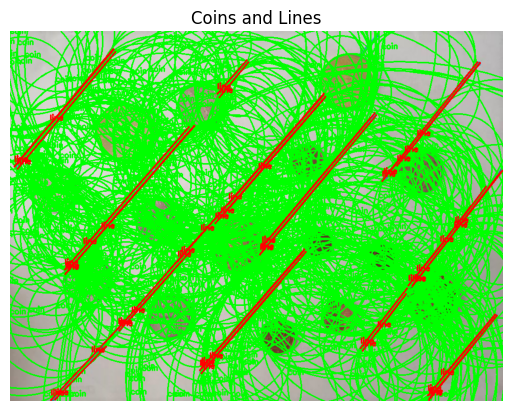

In [2]:
# 读取图像并进行预处理
img = cv2.imread('./2-2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
edges = cv2.Canny(gray, 50, 150)

# 检测图像中的圆
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
        cv2.putText(img, "coin", (x - r, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 检测图像中的直线
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(img, "line", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# 显示标记后的图像
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Coins and Lines')
plt.axis('off')

# 保存图像
plt.savefig('coins_and_lines_result.png', dpi=300, bbox_inches='tight')

plt.show()